<a href="https://colab.research.google.com/github/irshad9873/book-recommended-system/blob/main/Book_Recommended_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A recommender system, or a recommendation system, is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications.

**Mainly three types of recommendation systems in machine learning based on filtering are used to suggest product and services to the consumers**

1.Content Filtering

2.Collaborative Filtering

3.Hybrid Filtering

**1. Content Filtering:**

In this algorithm, we try finding items look alike. Once we have item look like matrix,we can easily recommend alike items to a customer, who has purchased any item from the store.

**2. Collaborative Filtering:**

Here, we try to search for look alike customers and offer products based on what his/her lookalike has chosen.This algorithm is very effective but takes a lot of time and resources.

**3. Hybrid Filtering (Content Filtering + Collaborative Filtering):**

Both Content Filtering & Collaborative Filtering is used for the purpose. you-tube uses this algorithm for their strong recommendation system.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
book=pd.read_csv("/content/Books.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [18]:
book=book.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year'})

In [19]:
book.isnull().sum()

ISBN           0
title          0
author         1
year           0
Publisher      2
Image-URL-S    0
Image-URL-M    0
Image-URL-L    3
dtype: int64

In [20]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   title        271360 non-null  object
 2   author       271359 non-null  object
 3   year         271360 non-null  object
 4   Publisher    271358 non-null  object
 5   Image-URL-S  271360 non-null  object
 6   Image-URL-M  271360 non-null  object
 7   Image-URL-L  271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [21]:
duplicateRowsDF = book[book.duplicated()]
duplicateRowsDF.shape

(0, 8)

we do not have duplicate rows now we will check if the isbn or the title is repeated

In [22]:
print("unique isbn: ",len(book["ISBN"].unique()))
print("total rows: ",book.shape[0])
print("unique title: ",len(book["title"].unique()))
print("total rows: ",book.shape[0])

unique isbn:  271360
total rows:  271360
unique title:  242135
total rows:  271360


In [24]:
book=book[['ISBN', 'title', 'author', 'year', 'Publisher']]

In [25]:
book.isnull().sum()

ISBN         0
title        0
author       1
year         0
Publisher    2
dtype: int64

In [26]:
book['author'].fillna("Unknown",inplace=True)
book['Publisher'].fillna("Unknown",inplace=True)
book.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


ISBN         0
title        0
author       0
year         0
Publisher    0
dtype: int64

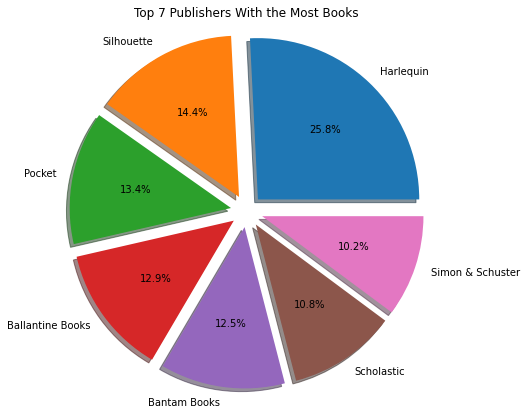

In [27]:
my_dict=(book['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['name','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon & Schuster'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Publishers With the Most Books")
ax1.axis ('equal')
plt.show()


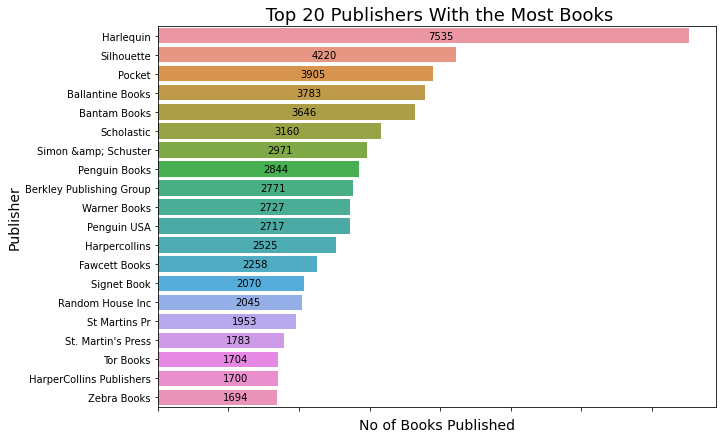

In [28]:
data = count.sort_values(by=['count'], ascending = False)
data = data.head(20)
x =['Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon &amp; Schuster']
y = [7537,4220,3905,3783,3646,3160,2971]
fig=plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'count',y = 'name' , data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
plt.xlabel("No of Books Published", size=14)
plt.ylabel("Publisher", size=14)
plt.title(" Top 20 Publishers With the Most Books", size=18)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width()/2, p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show()

In [6]:
rating=pd.read_csv("/content/Ratings.csv")

In [29]:
book['year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

we can see that the years are object type and we have zeros as well as there is some error by including names in years

In [32]:
index=book.loc[book['year']=='DK Publishing Inc'].index
book.drop(index,inplace=True)
index=book.loc[book['year']=='Gallimard'].index
book.drop(index,inplace=True)
book['year'].replace({'0':book['year'].value_counts().idxmax()},inplace=True)
book['year'] = book['year'].astype(str).astype(int)
book['year'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


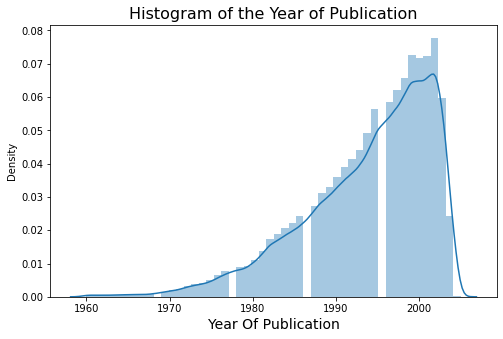

In [33]:
fig=plt.figure(figsize=(8,5))
y1 = book[book['year'] >= 1960]
y1 = y1[y1['year'] <= 2005]
sns.distplot(y1['year'])
plt.xlabel('Year Of Publication',size=14)
plt.title('Histogram of the Year of Publication',size=16)
plt.show()

Now analysis rating 

In [34]:
rating.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**Rename the columns name of Rating**

In [35]:
rating=rating.rename(columns={'User-ID':'user_id','Book-Rating':'rating'})

In [36]:
rating.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [37]:
rating['rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [38]:
rating.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

There is no null values 

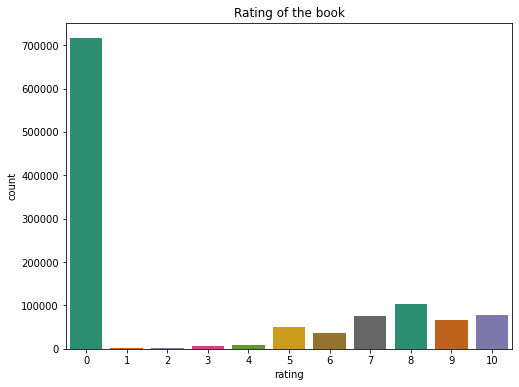

In [39]:
plt.figure(figsize = (8,6))
sns.countplot(data = rating, x = 'rating', palette = 'Dark2')
plt.xlabel('rating')
plt.title('Rating of the book');

 Now analysis user data

In [77]:
user=pd.read_csv("/content/uses.csv")

In [78]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [79]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [80]:
user['Age'].fillna(user['Age'].value_counts().idxmax(),inplace=True)

In [81]:
user.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


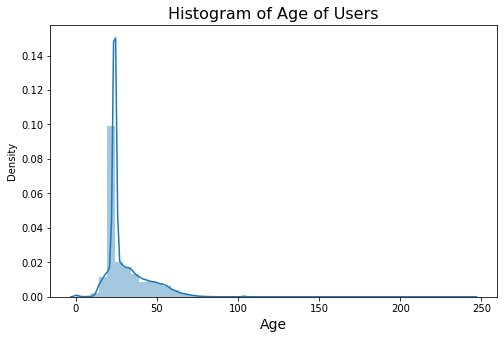

In [82]:
fig=plt.figure(figsize=(8,5))
sns.distplot(user['Age'])
plt.xlabel('Age',size=14)
plt.title('Histogram of Age of Users',size=16)
plt.show()


In [83]:
user['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

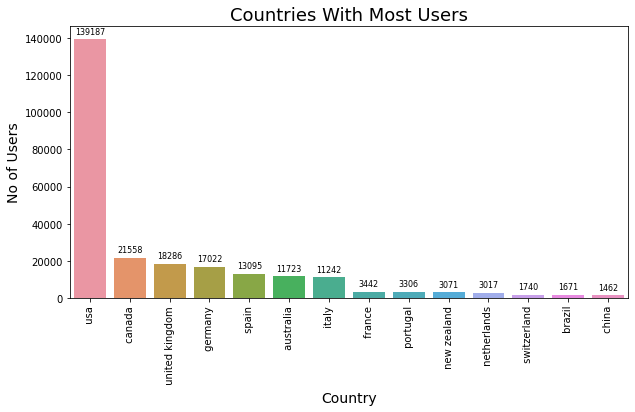

In [88]:
my_dict=(user['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['name','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
f.drop(7,inplace=True)
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(y = 'count',x= 'name' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 
plt.xlabel("Country", size=14)
plt.ylabel("No of Users", size=14)
plt.title("Countries With Most Users", size=18)
plt.show()

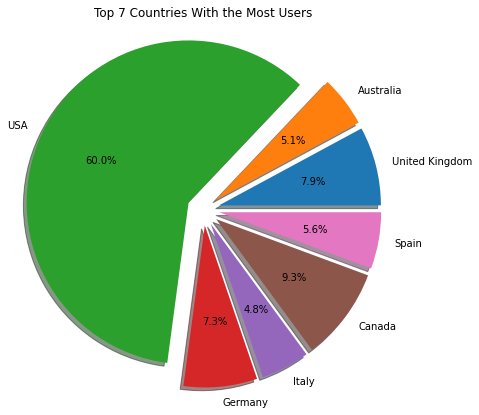

In [89]:
my_dict=(user['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['name','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'United Kingdom','Australia','USA','Germany','Italy','Canada','Spain'
sizes = [count['count'].iloc[2],count['count'].iloc[5],count['count'].iloc[0],count['count'].iloc[3],count['count'].iloc[6],count['count'].iloc[1],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )
fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Countries With the Most Users")
ax1.axis ('equal')

plt.show()

***Extract those columns which is most important***

In [11]:
book=book[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [90]:
book.head(2)

,ISBN,title,author,year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


**Rename the columns name of the book data**

In [91]:
book=book.rename(columns={'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'Year', 'Publisher':'publisher'})

In [92]:
book.head(1)

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press


**Rename the columns name of the user data**

In [93]:
user=user.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'})

In [94]:
user.head(2)

,user_id,age,city,state,country
0,1,24.0,nyc,new york,usa
1,2,18.0,stockton,california,usa


In [95]:
book.shape

(271357, 5)

In [96]:
user.shape

(278858, 5)

In [97]:
rating.shape

(1149780, 3)

**Count those user id of the book whose ratings are more than 200**

In [98]:
x=rating['user_id'].value_counts()>200

In [99]:
y=x[x].index

In [100]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [101]:
rating=rating[rating['user_id'].isin(y)]

In [102]:
rating.shape

(526356, 3)

In [103]:
rating.head(3)

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8


Merge the rating data into book data on ISBN 
its gives only those book which is present in the data after merge

In [104]:
rating_with_books=rating.merge(book,on='ISBN')

In [105]:
rating_with_books.shape

(487668, 7)

In [106]:
number_rating=rating_with_books.groupby('title')['rating'].count().reset_index()

In [107]:
number_rating.rename(columns={'rating':'number of rating'},inplace=True)

In [108]:
final_rating=rating_with_books.merge(number_rating,on='title')

**This is the final data for applying the algorithm**

In [109]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number of rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
487663,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,1
487664,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),1
487665,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",1
487666,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,1


In [110]:
type(final_rating)

pandas.core.frame.DataFrame

**Count only those books whose rating is more than 50.**

In [111]:
final_rating=final_rating[final_rating['number of rating']>=50]

In [112]:
final_rating.shape

(61853, 8)

**Drop the dublicates from the data set**

In [113]:
final_rating.drop_duplicates(['user_id','title'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [114]:
final_rating.shape

(59850, 8)

In [115]:
book_pivot=final_rating.pivot_table(columns='user_id',index='title',values='rating')

In [116]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


**Fill the null values in the pivot table**

In [117]:
book_pivot.fillna(0,inplace=True)

In [118]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Now use the algorithm ***

In [119]:
from scipy.sparse import csr_matrix

In [120]:
book_sparse=csr_matrix(book_pivot)

In [121]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute')


In [122]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [123]:
distances,suggestions=model.kneighbors(book_pivot.iloc[54,:].values.reshape(1,-1),n_neighbors=6)

In [124]:
distances

array([[ 0.        , 42.34383072, 43.48562981, 43.50861984, 43.56604182,
        43.89760814]])

In [125]:
suggestions

array([[ 54, 184, 291, 440, 393, 372]])

In [126]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='title')


In [127]:
np.where(book_pivot.index=='Animal Farm')[0][0]

54

**Make the def to fing the recommendation of the data**

In [128]:
def recommend_book(book_name):
  book_id=np.where(book_pivot.index==book_name)[0][0]
  distances,suggestions=model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)
  for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])


**This is the final recommendation of the books we input one book name then its give the 5 recommended books to read**

In [129]:
recommend_book('Animal Farm')

Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='title')
